In [1]:
import numpy as np
import scipy as sp
import math as ma
import qutip as qt
import matplotlib.pyplot as plt
import matplotlib as mpl
import miscfuncs as mf
import pyplotsetup
%matplotlib inline

In [2]:
fockdim = 200

# Square GKP code stabiliser generators
alpha = np.sqrt(0.5*np.pi)
beta = 1j*alpha 
Sx = mf.displacement_fock(2*alpha, fockdim)
Sz = mf.displacement_fock(2*beta, fockdim)

Mx, My, Mz = mf.gkp_measure_ops(fockdim, alpha, beta) # Pauli-bin operators
a = qt.destroy(fockdim) # annihilation operator

In [3]:
# Figure setup
fig_width_pt = 246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (ma.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
scaling = 2
fig_size =  [scaling*fig_width, scaling*fig_height]

# Explicitly set fontsizes:
font_size = 20
tick_size = 18
params = {
          #'backend': 'ps',
          'axes.labelsize': font_size,
          'font.size': font_size,
          'legend.fontsize': font_size,
          'xtick.labelsize': tick_size,
          'ytick.labelsize': tick_size,
          'text.usetex': True,
          'figure.figsize': fig_size,
          }
plt.rcParams.update(params)

default_cmap = plt.get_cmap("tab10")

# Ideal GKP codewords

## $| \bar{0} \rangle$

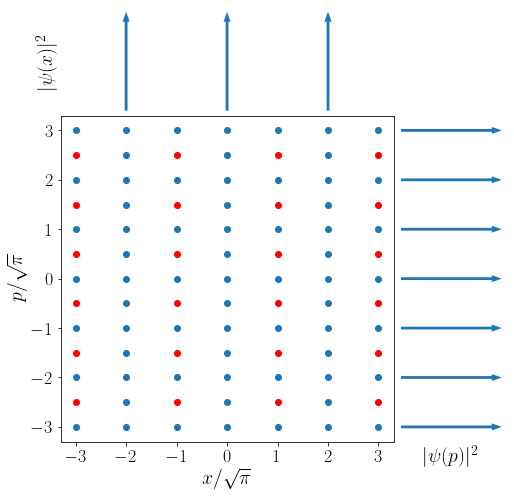

In [4]:
fig, ((ax, bx), (cx, dx)) = plt.subplots(2, 2, figsize = (8,8), gridspec_kw={'width_ratios': [3, 1], 'height_ratios': [1,3], \
                                                                            'wspace' : 0.01, 'hspace' : 0.0})
bx.axis("off")

xsteps = np.arange(-3, 4)
ysteps = np.arange(-6,7)

# Wigner function
posxcoords = []
negxcoords = []
posycoords = []
negycoords = []
for n in xsteps:
    for m in ysteps:
        if (-1.0)**(n*m) > 0:
            posxcoords.append(n * (ma.pi)**0.5)
            posycoords.append(m * 0.5*(ma.pi)**0.5)
        if (-1.0)**(n*m) < 0:
            negxcoords.append(n * (ma.pi)**0.5)
            negycoords.append(m * 0.5*(ma.pi)**0.5) 
cx.scatter(posxcoords, posycoords)
cx.scatter(negxcoords, negycoords, color='red')
# cx.set_aspect('equal')
cx.set_title(None)
cx.set_xlabel('$x / \sqrt{\pi}$', fontsize=font_size)
cx.set_xticks([-3*ma.pi**0.5, -2*ma.pi**0.5, -ma.pi**0.5, 0, ma.pi**0.5, 2*ma.pi**0.5, 3*ma.pi**0.5])
cx.set_xticklabels(['$-3$', '$-2$', '$-1$', '$0$', '$1$', '$2$', '$3$']) 
cx.set_ylabel('$p / \sqrt{\pi}$', fontsize=font_size)
cx.set_yticks([-3*ma.pi**0.5, -2*ma.pi**0.5, -ma.pi**0.5, 0, ma.pi**0.5, 2*ma.pi**0.5, 3*ma.pi**0.5])
cx.set_yticklabels(['$-3$', '$-2$', '$-1$', '$0$', '$1$', '$2$', '$3$']) 

# x wavefunction
for n in xsteps:
    if n%2==0:
        ax.arrow(n * (ma.pi)**0.5, 0, 0, 1, length_includes_head=True, head_width=0.25, head_length = 0.1, width = 0.1, \
                  facecolor='C0', edgecolor='none')
ax.set_xlim(cx.get_xlim())
ax.set_xticks([])
ax.set_yticks([])
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_ylabel('$|\psi(x)|^2$')

# p wavefunction
for n in ysteps:
    if n%2==0:
        dx.arrow(0, n * 0.5 * (ma.pi)**0.5, 1, 0, length_includes_head=True, head_width=0.25, head_length = 0.1, width = 0.1, \
                  facecolor='C0', edgecolor='none')
dx.set_ylim(cx.get_ylim())
dx.set_xticks([])
dx.set_yticks([])
dx.spines["top"].set_visible(False)
dx.spines["bottom"].set_visible(False)
dx.spines["right"].set_visible(False)
dx.spines["left"].set_visible(False)
dx.set_xlabel('$|\psi(p)|^2$')

plt.show()

## $| \bar{1} \rangle$

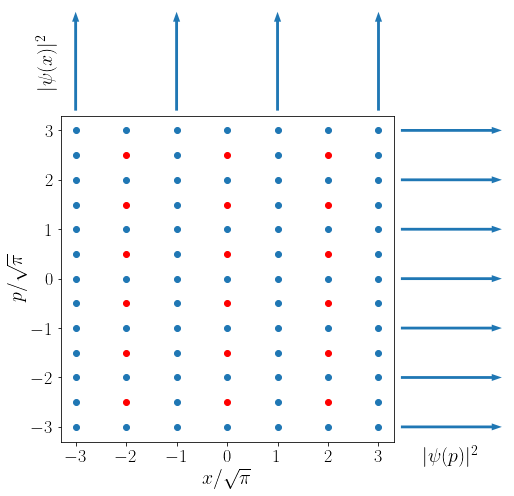

In [5]:
fig, ((ax, bx), (cx, dx)) = plt.subplots(2, 2, figsize = (8,8), gridspec_kw={'width_ratios': [3, 1], 'height_ratios': [1,3], \
                                                                            'wspace' : 0.01, 'hspace' : 0.0})
bx.axis("off")

xsteps = np.arange(-4, 3)
ysteps = np.arange(-6,7)

# Wigner function
posxcoords = []
negxcoords = []
posycoords = []
negycoords = []
for n in xsteps:
    for m in ysteps:
        if (-1.0)**(n*m) > 0:
            posxcoords.append((n+1) * (ma.pi)**0.5)
            posycoords.append(m * 0.5*(ma.pi)**0.5)
        if (-1.0)**(n*m) < 0:
            negxcoords.append((n+1) * (ma.pi)**0.5)
            negycoords.append(m * 0.5*(ma.pi)**0.5) 
cx.scatter(posxcoords, posycoords)
cx.scatter(negxcoords, negycoords, color = 'red')
cx.set_title(None)
cx.set_xlabel('$x / \sqrt{\pi}$', fontsize=font_size)
cx.set_xticks([-3*ma.pi**0.5, -2*ma.pi**0.5, -ma.pi**0.5, 0, ma.pi**0.5, 2*ma.pi**0.5, 3*ma.pi**0.5])
cx.set_xticklabels(['$-3$', '$-2$', '$-1$', '$0$', '$1$', '$2$', '$3$']) 
cx.set_ylabel('$p / \sqrt{\pi}$', fontsize=font_size)
cx.set_yticks([-3*ma.pi**0.5, -2*ma.pi**0.5, -ma.pi**0.5, 0, ma.pi**0.5, 2*ma.pi**0.5, 3*ma.pi**0.5])
cx.set_yticklabels(['$-3$', '$-2$', '$-1$', '$0$', '$1$', '$2$', '$3$']) 

# x wavefunction
for n in xsteps:
    if n%2==0:
        ax.arrow((n+1) * (ma.pi)**0.5, 0, 0, 1, length_includes_head=True, head_width=0.25, head_length = 0.1, width = 0.1, \
                  facecolor='C0', edgecolor='none')
ax.set_xlim(cx.get_xlim())
ax.set_xticks([])
ax.set_yticks([])
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_ylabel('$|\psi(x)|^2$')

# p wavefunction
for n in ysteps:
    if n%2==0:
        dx.arrow(0, n * 0.5 * (ma.pi)**0.5, 1, 0, length_includes_head=True, head_width=0.25, head_length = 0.1, width = 0.1, \
                  facecolor='C0', edgecolor='none')
dx.set_ylim(cx.get_ylim())
dx.set_xticks([])
dx.set_yticks([])
dx.spines["top"].set_visible(False)
dx.spines["bottom"].set_visible(False)
dx.spines["right"].set_visible(False)
dx.spines["left"].set_visible(False)
dx.set_xlabel('$|\psi(p)|^2$')

plt.show()

# Approximate GKP codewords

In [6]:
# Approximate GKP codewords
N = 4
Delta = 0.25
ApproxGKP0 = qt.Qobj(np.zeros(fockdim))
ApproxGKP1 = qt.Qobj(np.zeros(fockdim))
for m in np.arange(-N, N+1, dtype=float):
    for n in np.arange(-N, N+1, dtype=float):
        ApproxGKP0 += (-Delta**2 * a.dag()*a).expm() * \
            np.exp(-1j*ma.pi*m*n) * mf.displacement_fock(2*m*alpha + n*beta, fockdim) * qt.basis(fockdim, 0)
        ApproxGKP1 += (-Delta**2 * a.dag()*a).expm() * \
            np.exp(-1j*ma.pi * (m*n + 0.5*n)) * mf.displacement_fock((2*m + 1)*alpha + n*beta, fockdim) * qt.basis(fockdim, 0)

## $| \bar{0}^\Delta \rangle$

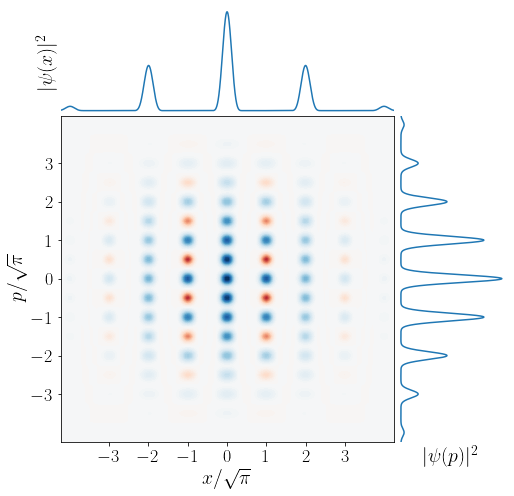

In [7]:
fig, ((ax, bx), (cx, dx)) = plt.subplots(2, 2, figsize = (8,8), gridspec_kw={'width_ratios': [3, 1], 'height_ratios': [1,3], \
                                                                            'wspace' : 0.01, 'hspace' : 0.0})
bx.axis("off")

# Wigner function
qt.plot_wigner(ApproxGKP0, fig, cx)
cx.set_title(None)
cx.set_xlabel('$x / \sqrt{\pi}$', fontsize=font_size)
cx.set_xticks([-3*ma.pi**0.5, -2*ma.pi**0.5, -ma.pi**0.5, 0, ma.pi**0.5, 2*ma.pi**0.5, 3*ma.pi**0.5])
cx.set_xticklabels(['$-3$', '$-2$', '$-1$', '$0$', '$1$', '$2$', '$3$']) 
cx.set_ylabel('$p / \sqrt{\pi}$', fontsize=font_size)
cx.set_yticks([-3*ma.pi**0.5, -2*ma.pi**0.5, -ma.pi**0.5, 0, ma.pi**0.5, 2*ma.pi**0.5, 3*ma.pi**0.5])
cx.set_yticklabels(['$-3$', '$-2$', '$-1$', '$0$', '$1$', '$2$', '$3$']) 

# wavefunctions
xvalues = np.arange(-7.5, 7.5, 0.001) 
psix = mf.fock_to_pos(ApproxGKP0, xvalues, 0.0) # x
psip = mf.fock_to_pos(ApproxGKP0, xvalues, ma.pi/2) # p

ax.plot(xvalues, np.abs(psix)**2)
ax.set_xticks([])
ax.set_yticks([])
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_xlim(cx.get_xlim())
ax.set_ylabel('$|\psi(x)|^2$')

dx.plot(np.abs(psip)**2, xvalues)
dx.set_xticks([])
dx.set_yticks([])
dx.spines["top"].set_visible(False)
dx.spines["bottom"].set_visible(False)
dx.spines["right"].set_visible(False)
dx.spines["left"].set_visible(False)
dx.set_ylim(cx.get_ylim())
dx.set_xlabel('$|\psi(p)|^2$')

plt.show()

## $| \bar{1}^\Delta \rangle$

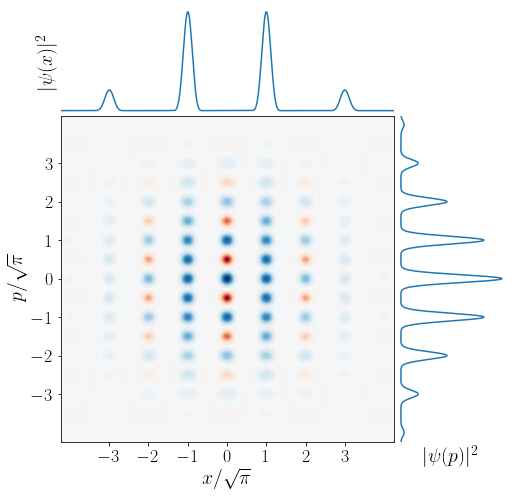

In [8]:
fig, ((ax, bx), (cx, dx)) = plt.subplots(2, 2, figsize = (8,8), gridspec_kw={'width_ratios': [3, 1], 'height_ratios': [1,3], \
                                                                            'wspace' : 0.01, 'hspace' : 0.0})
bx.axis("off")

# Wigner function
qt.plot_wigner(ApproxGKP1, fig, cx)
cx.set_title(None)
cx.set_xlabel('$x / \sqrt{\pi}$', fontsize=font_size)
cx.set_xticks([-3*ma.pi**0.5, -2*ma.pi**0.5, -ma.pi**0.5, 0, ma.pi**0.5, 2*ma.pi**0.5, 3*ma.pi**0.5])
cx.set_xticklabels(['$-3$', '$-2$', '$-1$', '$0$', '$1$', '$2$', '$3$']) 
cx.set_ylabel('$p / \sqrt{\pi}$', fontsize=font_size)
cx.set_yticks([-3*ma.pi**0.5, -2*ma.pi**0.5, -ma.pi**0.5, 0, ma.pi**0.5, 2*ma.pi**0.5, 3*ma.pi**0.5])
cx.set_yticklabels(['$-3$', '$-2$', '$-1$', '$0$', '$1$', '$2$', '$3$']) 

# wavefunctions
xvalues = np.arange(-7.5, 7.5, 0.001) 
psix = mf.fock_to_pos(ApproxGKP1, xvalues, 0.0) # x
psip = mf.fock_to_pos(ApproxGKP1, xvalues, ma.pi/2) # p

ax.plot(xvalues, np.abs(psix)**2)
ax.set_xticks([])
ax.set_yticks([])
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_xlim(cx.get_xlim())
ax.set_ylabel('$|\psi(x)|^2$')

dx.plot(np.abs(psip)**2, xvalues)
dx.set_xticks([])
dx.set_yticks([])
dx.spines["top"].set_visible(False)
dx.spines["bottom"].set_visible(False)
dx.spines["right"].set_visible(False)
dx.spines["left"].set_visible(False)
dx.set_ylim(cx.get_ylim())
dx.set_xlabel('$|\psi(p)|^2$')

plt.show()

# HGKP ground states

In [9]:
# Define Hamiltonian 
J = 1
w = 0.25**4 * 4*ma.pi * J # Corresponds to Delta = 0.25
print(w)
HGKP = w*a.dag()*a - J*0.5*(Sz + Sz.dag() + Sx + Sx.dag())

# Compute eigenenergies and eigenstates
vals, states = HGKP.eigenstates()
GKP_states = [states[0], states[1]]

0.04908738521234052


## $| H_+ \rangle$

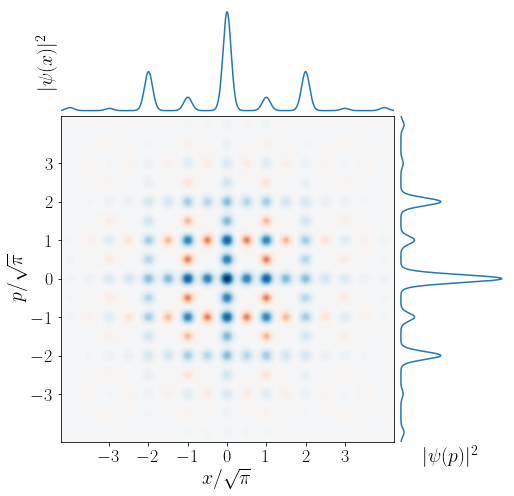

In [10]:
fig, ((ax, bx), (cx, dx)) = plt.subplots(2, 2, figsize = (8,8), gridspec_kw={'width_ratios': [3, 1], 'height_ratios': [1,3], \
                                                                            'wspace' : 0.01, 'hspace' : 0.0})
bx.axis("off")

# Wigner function
qt.plot_wigner(GKP_states[0], fig, cx)
cx.set_title(None)
cx.set_xlabel('$x / \sqrt{\pi}$', fontsize=font_size)
cx.set_xticks([-3*ma.pi**0.5, -2*ma.pi**0.5, -ma.pi**0.5, 0, ma.pi**0.5, 2*ma.pi**0.5, 3*ma.pi**0.5])
cx.set_xticklabels(['$-3$', '$-2$', '$-1$', '$0$', '$1$', '$2$', '$3$']) 
cx.set_ylabel('$p / \sqrt{\pi}$', fontsize=font_size)
cx.set_yticks([-3*ma.pi**0.5, -2*ma.pi**0.5, -ma.pi**0.5, 0, ma.pi**0.5, 2*ma.pi**0.5, 3*ma.pi**0.5])
cx.set_yticklabels(['$-3$', '$-2$', '$-1$', '$0$', '$1$', '$2$', '$3$']) 

# wavefunctions
xvalues = np.arange(-7.5, 7.5, 0.001) 
psix = mf.fock_to_pos(GKP_states[0], xvalues, 0.0) # x
psip = mf.fock_to_pos(GKP_states[0], xvalues, ma.pi/2) # p

ax.plot(xvalues, np.abs(psix)**2)
ax.set_xticks([])
ax.set_yticks([])
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_xlim(cx.get_xlim())
ax.set_ylabel('$|\psi(x)|^2$')

dx.plot(np.abs(psip)**2, xvalues)
dx.set_xticks([])
dx.set_yticks([])
dx.spines["top"].set_visible(False)
dx.spines["bottom"].set_visible(False)
dx.spines["right"].set_visible(False)
dx.spines["left"].set_visible(False)
dx.set_ylim(cx.get_ylim())
dx.set_xlabel('$|\psi(p)|^2$')

plt.show()

## $| H_- \rangle$

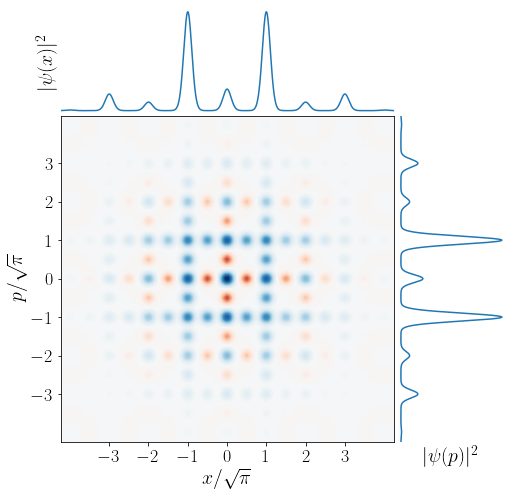

In [11]:
fig, ((ax, bx), (cx, dx)) = plt.subplots(2, 2, figsize = (8,8), gridspec_kw={'width_ratios': [3, 1], 'height_ratios': [1,3], \
                                                                            'wspace' : 0.01, 'hspace' : 0.0})
bx.axis("off")

# Wigner function
qt.plot_wigner(GKP_states[1], fig, cx)
cx.set_title(None)
cx.set_xlabel('$x / \sqrt{\pi}$', fontsize=font_size)
cx.set_xticks([-3*ma.pi**0.5, -2*ma.pi**0.5, -ma.pi**0.5, 0, ma.pi**0.5, 2*ma.pi**0.5, 3*ma.pi**0.5])
cx.set_xticklabels(['$-3$', '$-2$', '$-1$', '$0$', '$1$', '$2$', '$3$']) 
cx.set_ylabel('$p / \sqrt{\pi}$', fontsize=font_size)
cx.set_yticks([-3*ma.pi**0.5, -2*ma.pi**0.5, -ma.pi**0.5, 0, ma.pi**0.5, 2*ma.pi**0.5, 3*ma.pi**0.5])
cx.set_yticklabels(['$-3$', '$-2$', '$-1$', '$0$', '$1$', '$2$', '$3$']) 

# wavefunctions
xvalues = np.arange(-7.5, 7.5, 0.001) 
psix = mf.fock_to_pos(GKP_states[1], xvalues, 0.0) # x
psip = mf.fock_to_pos(GKP_states[1], xvalues, ma.pi/2) # p

ax.plot(xvalues, np.abs(psix)**2)
ax.set_xticks([])
ax.set_yticks([])
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_xlim(cx.get_xlim())
ax.set_ylabel('$|\psi(x)|^2$')

dx.plot(np.abs(psip)**2, xvalues)
dx.set_xticks([])
dx.set_yticks([])
dx.spines["top"].set_visible(False)
dx.spines["bottom"].set_visible(False)
dx.spines["right"].set_visible(False)
dx.spines["left"].set_visible(False)
dx.set_ylim(cx.get_ylim())
dx.set_xlabel('$|\psi(p)|^2$')

plt.show()

# Square Pulse

In [12]:
[Deltats, fidelities_pm, squeezings_pm] = qt.qload('data/Deltat_vs_fidelities_pm,w0=0.05')

Loaded list object.


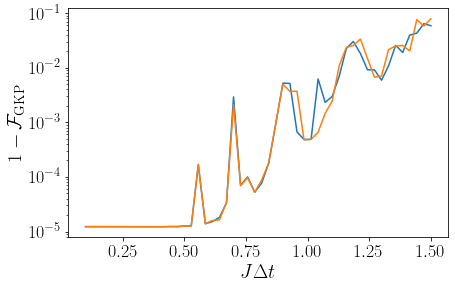

In [13]:
plt.plot(Deltats, 1 - np.array(fidelities_pm))
plt.yscale('log')
plt.xlabel(r'$J \Delta t$')
plt.ylabel(r'$1 - \mathcal{F}_\mathrm{GKP}$')
plt.show()

In [14]:
1 - np.array(fidelities_pm[21])

array([0.00292439, 0.00209181])

In [15]:
[w0s, fidelities_pm, squeezings_pmR] = qt.qload('data/w0_vs_squeezing_pm,Deltat=0.1')

Loaded list object.


In [16]:
w0s[w0s>=0.05][0]

0.05059197488435825

In [17]:
np.array(squeezings_pmR)[:,0][w0s>=0.05][0]

11.47660630873891

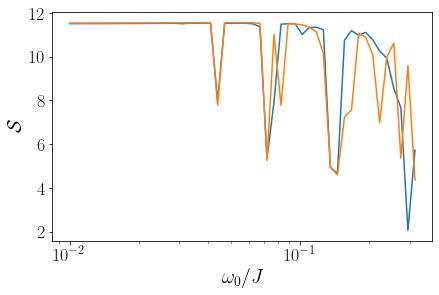

In [18]:
plt.plot(w0s, squeezings_pm)
plt.xscale('log')
plt.xlabel(r'$\omega_0/J$')
plt.ylabel(r'$\mathcal{S}$')
plt.show()

In [19]:
w0s[np.min(np.array(squeezings_pmR)[:,:2], axis=1)>10][-1]

0.08286427728546843

In [20]:
w0s

array([0.01      , 0.01073031, 0.01151395, 0.01235483, 0.01325711,
       0.01422529, 0.01526418, 0.01637894, 0.01757511, 0.01885863,
       0.0202359 , 0.02171374, 0.02329952, 0.0250011 , 0.02682696,
       0.02878616, 0.03088844, 0.03314425, 0.0355648 , 0.03816213,
       0.04094915, 0.04393971, 0.04714866, 0.05059197, 0.05428675,
       0.05825137, 0.06250552, 0.06707036, 0.07196857, 0.0772245 ,
       0.08286428, 0.08891593, 0.09540955, 0.1023774 , 0.10985411,
       0.11787686, 0.12648552, 0.13572288, 0.14563485, 0.1562707 ,
       0.16768329, 0.17992936, 0.19306977, 0.20716984, 0.22229965,
       0.2385344 , 0.25595479, 0.27464741, 0.29470517, 0.31622777])

In [21]:
[squeezings, GKP_floquet_states, decoded_GKP_floquet_states] = qt.qload('data/SP_hplusminus_states,Deltat=0.1,w0=0.05')

Loaded list object.


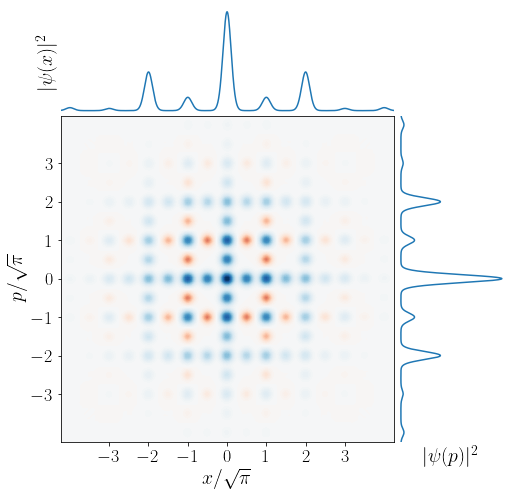

In [22]:
fig, ((ax, bx), (cx, dx)) = plt.subplots(2, 2, figsize = (8,8), gridspec_kw={'width_ratios': [3, 1], 'height_ratios': [1,3], \
                                                                            'wspace' : 0.01, 'hspace' : 0.0})

for i in range(2):
    bx.axis("off")
    if i > 0:
        ax.clear()
        cx.clear()
        dx.clear()
    # Wigner function
    qt.plot_wigner(GKP_floquet_states[i], fig, cx)
    cx.set_title(None)
    cx.set_xlabel('$x / \sqrt{\pi}$', fontsize=font_size)
    cx.set_xticks([-3*ma.pi**0.5, -2*ma.pi**0.5, -ma.pi**0.5, 0, ma.pi**0.5, 2*ma.pi**0.5, 3*ma.pi**0.5])
    cx.set_xticklabels(['$-3$', '$-2$', '$-1$', '$0$', '$1$', '$2$', '$3$']) 
    cx.set_ylabel('$p / \sqrt{\pi}$', fontsize=font_size)
    cx.set_yticks([-3*ma.pi**0.5, -2*ma.pi**0.5, -ma.pi**0.5, 0, ma.pi**0.5, 2*ma.pi**0.5, 3*ma.pi**0.5])
    cx.set_yticklabels(['$-3$', '$-2$', '$-1$', '$0$', '$1$', '$2$', '$3$']) 


    # wavefunctions
    xvalues = np.arange(-7.5, 7.5, 0.001) 
    psix = mf.fock_to_pos(GKP_floquet_states[i], xvalues, 0.0) # x
    psip = mf.fock_to_pos(GKP_floquet_states[i], xvalues, ma.pi/2) # p

    ax.plot(xvalues, np.abs(psix)**2)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.set_xlim(cx.get_xlim())
    ax.set_ylabel('$|\psi(x)|^2$')

    dx.plot(np.abs(psip)**2, xvalues)
    dx.set_xticks([])
    dx.set_yticks([])
    dx.spines["top"].set_visible(False)
    dx.spines["bottom"].set_visible(False)
    dx.spines["right"].set_visible(False)
    dx.spines["left"].set_visible(False)
    dx.set_ylim(cx.get_ylim())
    dx.set_xlabel('$|\psi(p)|^2$')
    
    if i==0:
        plt.show()
    if i==1:
        plt.show()

In [23]:
squeezings

[11.506024027066292, 11.527667175788148]

# Harmonic drive

In [24]:
# Driving function
def f(t, args):
    w = args['w']
    A = args['A']
    f = 0
    for n in range(len(A)):
        if n == 0:
            f += 0.5*A[n]
        else: 
            f += A[n]*np.cos(4*n*w*t)
    return f

In [25]:
# Change fontsizes and linewidth:
font_size = 32
tick_size = 28
line_width = 2
params = {
          #'backend': 'ps',
          'axes.labelsize': font_size,
          'font.size': font_size,
          'legend.fontsize': font_size,  
          'xtick.labelsize': tick_size,
          'ytick.labelsize': tick_size,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'axes.linewidth': line_width,  
          'lines.linewidth': line_width,   
          }
plt.rcParams.update(params)

default_cmap = plt.get_cmap("tab10")

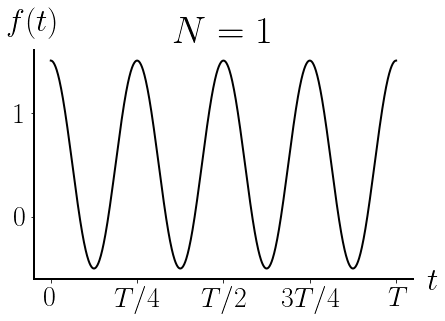

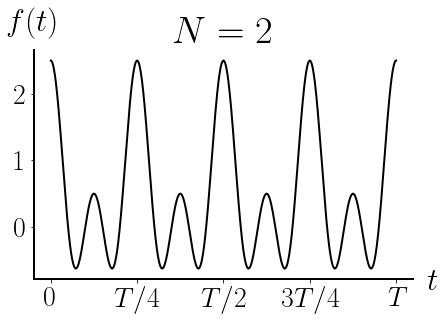

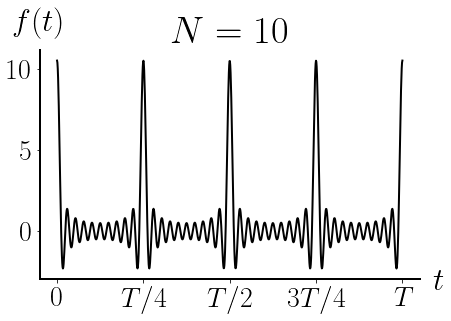

In [26]:
w = 1
T = 2*ma.pi/w
t = np.linspace(0,T,1000)
Ns = [1, 2, 10]
for N in Ns:
    plt.plot(t,f(t, {'w':w, 'A':np.ones(N+1)}), color='black')
    plt.xlabel(r'$t$')
    plt.ylabel(r'$f(t)$', rotation='horizontal')
    plt.xticks([0, T/4, T/2, 3*T/4, T])
    ax = plt.gca()
    ax.xaxis.set_label_coords(1.05, 0.05)
    ax.yaxis.set_label_coords(0.0, 1.05)
    ax.set_xticklabels([r'$0$', r'$T/4$', r'$T/2$', r'$3T/4$', r'$T$']) 
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.title(f'$N={N}$')
    plt.show()
    ax.clear()

In [27]:
# Change back set fontsizes and linewidths:
font_size = 20
tick_size = 18
params = {
          #'backend': 'ps',
          'axes.labelsize': font_size,
          'font.size': font_size,
          'legend.fontsize': font_size,
          'xtick.labelsize': tick_size,
          'ytick.labelsize': tick_size,
          'axes.linewidth': 1, 
          'text.usetex': True,
          'figure.figsize': fig_size,
          }
plt.rcParams.update(params)

default_cmap = plt.get_cmap("tab10")

In [28]:
[Ns, squeezings_pm, fidelities_pm, quasienergies_pm] = qt.qload('data/N_vs_SFE,J=0.01')

Loaded list object.


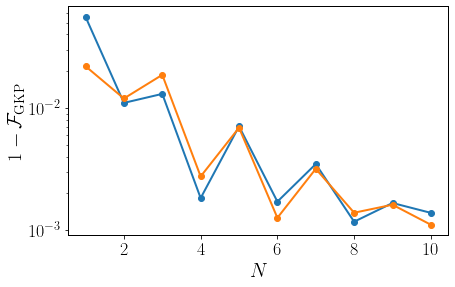

In [29]:
plt.plot(Ns, 1-np.array(fidelities_pm), 'o-')
plt.yscale('log')
plt.xlabel(r'$N$')
plt.ylabel(r'$1 - \mathcal{F}_\mathrm{GKP}$')
plt.show()

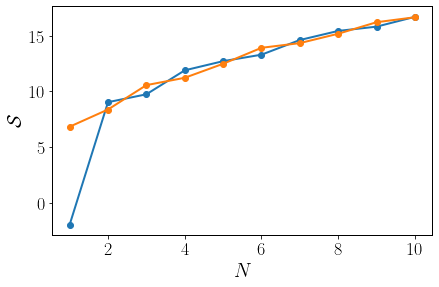

In [30]:
plt.plot(Ns, squeezings_pm, 'o-')
plt.xlabel(r'$N$')
plt.ylabel(r'$\mathcal{S}$')
plt.show()

In [31]:
[Js, squeezings_pm, fidelities_pm, quasienergies_pm] = qt.qload('data/J_vs_SFE,N=4')

Loaded list object.


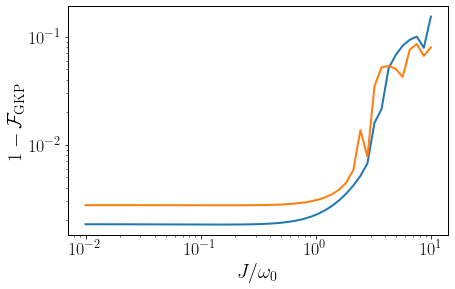

In [32]:
plt.plot(Js, 1-np.array(fidelities_pm))
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$J/\omega_0$')
plt.ylabel(r'$1 - \mathcal{F}_\mathrm{GKP}$')
plt.show()

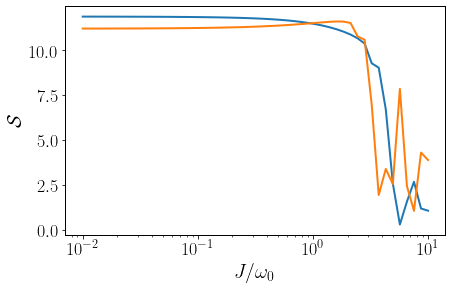

In [33]:
plt.plot(Js, squeezings_pm)
plt.xscale('log')
plt.xlabel(r'$J/\omega_0$')
plt.ylabel(r'$\mathcal{S}$')
plt.show()

In [34]:
[Ns, Ns_squeezings_pm, Ns_fidelities_pm, Ns_quasienergies_pm] = qt.qload('data/N_vs_SFE,J=0.01')
[Js, Js_squeezings_pm, Js_fidelities_pm, Js_quasienergies_pm] = qt.qload('data/J_vs_SFE,N=4,J=[1e-5,10],v2')

Loaded list object.
Loaded list object.


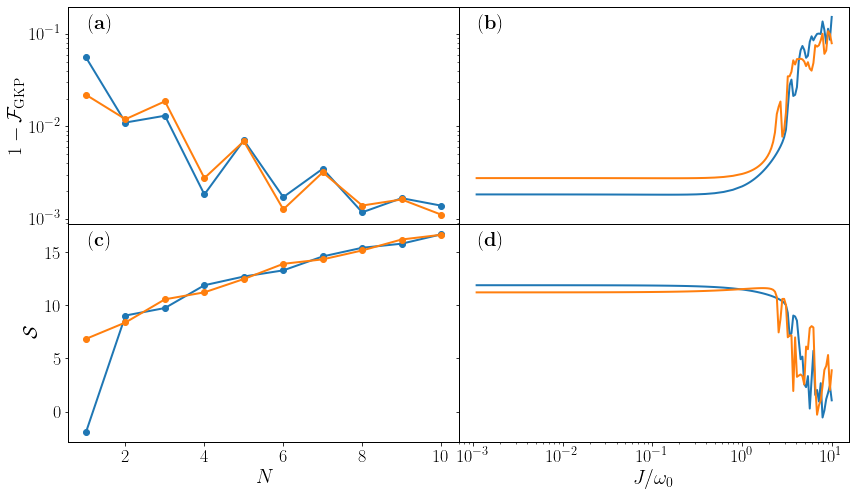

In [35]:
fig = plt.figure(figsize=(14,8))
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
axs = gs.subplots(sharex='col', sharey='row')
axs[0,0].plot(Ns, 1-np.array(Ns_fidelities_pm), 'o-')
axs[1,0].plot(Ns, Ns_squeezings_pm, 'o-')
axs[0,1].plot(Js[20:], 1-np.array(Js_fidelities_pm)[20:,:])
axs[1,1].plot(Js[20:], Js_squeezings_pm[20:])
axs[0,1].set_xscale('log')
axs[0,0].set_yscale('log')
axs[0,0].set_ylabel(r'$1 - \mathcal{F}_\mathrm{GKP}$')
axs[1,0].set_ylabel(r'$\mathcal{S}$')
axs[1,0].set_xlabel(r'$N$')
axs[1,1].set_xlabel(r'$J/\omega_0$')
axs[0,0].text(0.05, 0.9, r'$\mathbf{(a)}$',transform=axs[0,0].transAxes)
axs[0,1].text(0.05, 0.9, r'$\mathbf{(b)}$',transform=axs[0,1].transAxes)
axs[1,0].text(0.05, 0.9, r'$\mathbf{(c)}$',transform=axs[1,0].transAxes)
axs[1,1].text(0.05, 0.9, r'$\mathbf{(d)}$',transform=axs[1,1].transAxes)
plt.show()

In [36]:
Js

array([1.00000000e-05, 1.26485522e-05, 1.59985872e-05, 2.02358965e-05,
       2.55954792e-05, 3.23745754e-05, 4.09491506e-05, 5.17947468e-05,
       6.55128557e-05, 8.28642773e-05, 1.04811313e-04, 1.32571137e-04,
       1.67683294e-04, 2.12095089e-04, 2.68269580e-04, 3.39322177e-04,
       4.29193426e-04, 5.42867544e-04, 6.86648845e-04, 8.68511374e-04,
       1.09854114e-03, 1.38949549e-03, 1.75751062e-03, 2.22299648e-03,
       2.81176870e-03, 3.55648031e-03, 4.49843267e-03, 5.68986603e-03,
       7.19685673e-03, 9.10298178e-03, 1.15139540e-02, 1.45634848e-02,
       1.84206997e-02, 2.32995181e-02, 2.94705170e-02, 3.72759372e-02,
       4.71486636e-02, 5.96362332e-02, 7.54312006e-02, 9.54095476e-02,
       1.20679264e-01, 1.52641797e-01, 1.93069773e-01, 2.44205309e-01,
       3.08884360e-01, 3.90693994e-01, 4.94171336e-01, 6.25055193e-01,
       7.90604321e-01, 1.00000000e+00, 1.00000000e+00, 1.04811313e+00,
       1.09854114e+00, 1.15139540e+00, 1.20679264e+00, 1.26485522e+00,
      

In [37]:
np.array(Js_squeezings_pm)[(Js<1.1) & (Js>0.99)]

array([[11.49329615, 11.52519639],
       [11.49329615, 11.52519639],
       [11.46994229, 11.53604678],
       [11.44519049, 11.54689035]])

In [38]:
[Ns, A0_squeezings_pm, A0_fidelities_pm, A0_quasienergies_pm] = qt.qload('data/N_vs_SFE,J=0.01')
[Ns, Aopt_squeezings_Mpm, Aopt_fidelities_pm, Aopt_quasienergies_Mpm, Aopt_quasienergies_012, Aopt_max_squeezed_floquet_states] = qt.qload('data/N_vs_SFE_Aopt,J=0.01')

Loaded list object.
Loaded list object.


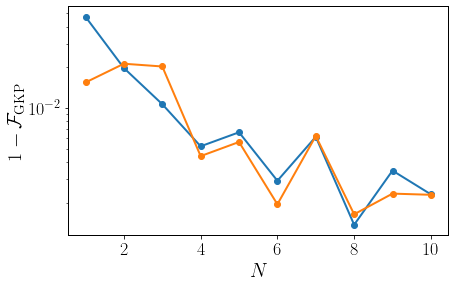

In [39]:
plt.plot(Ns, 1 - np.array(Aopt_fidelities_pm), 'o-')
plt.yscale('log')
plt.xlabel(r'$N$')
plt.ylabel(r'$1 - \mathcal{F}_\mathrm{GKP}$')
plt.show()

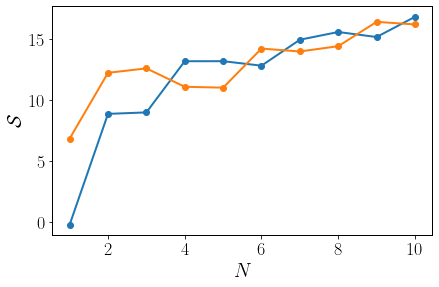

In [40]:
plt.plot(Ns, np.array(Aopt_squeezings_Mpm)[:,1:], 'o-')
plt.xlabel(r'$N$')
plt.ylabel(r'$\mathcal{S}$')
plt.show()

Text(0, 0.5, '$1 - \\mathcal{F}_\\mathrm{GKP}$')

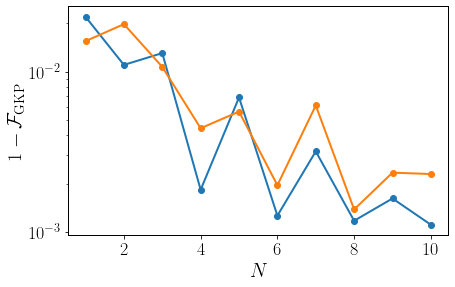

In [41]:
plt.plot(Ns, 1 - np.max(A0_fidelities_pm, axis=1), 'o-')
plt.plot(Ns, 1 - np.max(Aopt_fidelities_pm, axis=1), 'o-')
plt.xlabel(r'$N$')
plt.yscale('log')
plt.ylabel(r'$1 - \mathcal{F}_\mathrm{GKP}$')

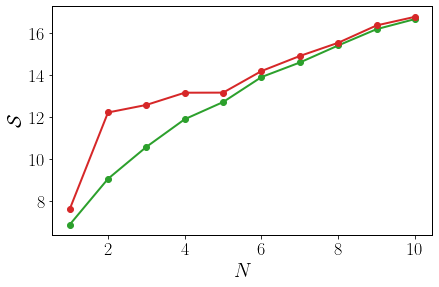

In [42]:
plt.plot(Ns, np.max(A0_squeezings_pm, axis=1), 'o-', color=default_cmap(2))
plt.plot(Ns, np.array(Aopt_squeezings_Mpm)[:,0], 'o-', color=default_cmap(3))
plt.xlabel(r'$N$')
plt.ylabel(r'$\mathcal{S}$')
plt.show()

# Quasienergies

In [43]:
[w0s, Ts, quasienergies, quasienergies_pm] = qt.qload('data/SP_w0_vs_quasienergies,Deltat=0.01')

Loaded list object.


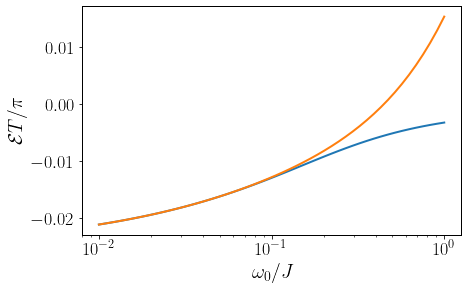

In [44]:
plt.plot(w0s, np.array(quasienergies_pm)[:,0]*np.array(Ts)/np.pi)
plt.plot(w0s, np.array(quasienergies_pm)[:,1]*np.array(Ts)/np.pi)
plt.xlabel(r'$\omega_0/J$')
plt.ylabel(r'$\mathcal{E}T/\pi$')
plt.xscale('log')
plt.show()

In [45]:
[Js, T, quasienergies, quasienergies_hpm, quasienergies_ypm, quasienergies_4S] = qt.qload('data/HD_J_vs_quasienergies,N=4')

Loaded list object.


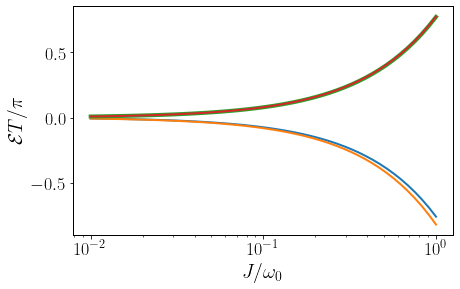

In [46]:
for i in range(2):
    plt.plot(Js, np.array(quasienergies_hpm)[:,i]*T/np.pi)

plt.plot(Js, np.array(quasienergies_ypm)[:,0]*T/np.pi, linewidth=4)
plt.plot(Js, np.array(quasienergies_ypm)[:,1]*T/np.pi)
plt.xlabel(r'$J/\omega_0$')
plt.ylabel(r'$\mathcal{E}T/\pi$')
plt.xscale('log')
plt.show()

## Quasienergy spectra

In [47]:
[T, quasienergies, quasienergies_pm, photon_numbers] = qt.qload('data/SP_quasienergy_spectrum,Deltat=0.1,w0=0.05')

Loaded list object.


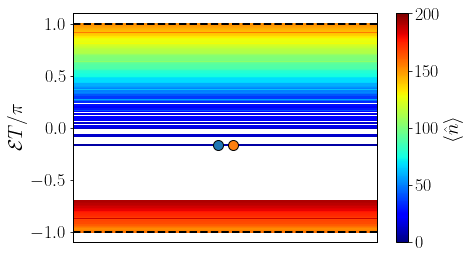

In [48]:
photon_numbers = np.array(photon_numbers)
norm = mpl.colors.Normalize(vmin=0, vmax=200)
cmap = plt.cm.ScalarMappable(norm=norm, cmap=mpl.cm.jet)
cmap.set_array([])
fig, ax = plt.subplots()
for i in range(fockdim):
    ax.axhline(y=quasienergies[i]*T/np.pi,  c=cmap.to_rgba(photon_numbers[i]))
    
eps = 0.025
ax.plot(0.5-eps, quasienergies_pm[0]*T/np.pi, 'o', markersize=10, markerfacecolor=default_cmap(0), color='black')
ax.plot(0.5+eps, quasienergies_pm[0]*T/np.pi, 'o', markersize=10, markerfacecolor=default_cmap(1), color='black')
    
plt.axhline(y=1, linestyle='--', color='black')
plt.axhline(y=-1, linestyle='--', color='black')

cbar = fig.colorbar(cmap)
cbar.set_label(r'$\langle \hat{n} \rangle$')
ax.set_ylabel(r'$\mathcal{E}T/\pi$')
ax.set_xticks([])
ax.set_xlim([0,1])
plt.show()

In [49]:
[T, quasienergies, quasienergies_4S, photon_numbers] = qt.qload('data/HD_quasienergy_spectrum,N=4,J=0.01')

Loaded list object.


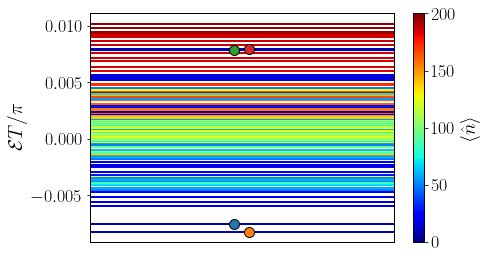

In [50]:
photon_numbers = np.array(photon_numbers)
norm = mpl.colors.Normalize(vmin=0, vmax=200)
cmap = plt.cm.ScalarMappable(norm=norm, cmap=mpl.cm.jet)
cmap.set_array([])
fig, ax = plt.subplots()
for i in range(fockdim):
    ax.axhline(y=quasienergies[i]*T/np.pi,  c=cmap.to_rgba(photon_numbers[i]))

eps = 0.025
ax.plot(0.5-eps, quasienergies_4S[0]*T/np.pi, 'o', markersize=10, markerfacecolor=default_cmap(0), color='black')
ax.plot(0.5+eps, quasienergies_4S[3]*T/np.pi, 'o', markersize=10, markerfacecolor=default_cmap(1), color='black')
ax.plot(0.5-eps, quasienergies_4S[1]*T/np.pi, 'o', markersize=10, markerfacecolor=default_cmap(2), color='black')
ax.plot(0.5+eps, quasienergies_4S[2]*T/np.pi, 'o', markersize=10, markerfacecolor=default_cmap(3), color='black')

cbar = fig.colorbar(cmap)
cbar.set_label(r'$\langle \hat{n} \rangle$')
ax.set_ylabel(r'$\mathcal{E}T/\pi$')
ax.set_xticks([])
ax.set_xlim([0,1])
plt.show()

# Second order Magnus expansion

In [51]:
[integrals, errors, times] = qt.qload('C:\\Users\\Xanda Kolesnikow\\OneDrive\\University\\Honours\\Research project\\Code\\saved\\Thesis figures data\\2nd_order_correction_integration_data_DD_N=4_50x50')

Loaded list object.


C:\Users\Xanda Kolesnikow\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


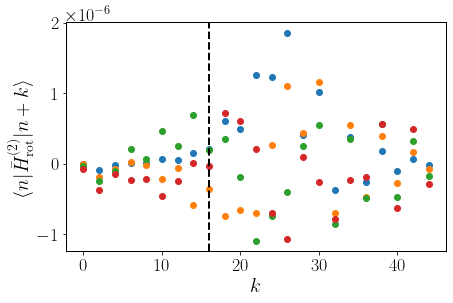

In [52]:
w = 1
J = 1e-2
dim = 50
H2 = -J**2/(4*1j*ma.pi*w) * integrals
for i in range(4):
    plt.scatter(np.arange(dim)[:-4:2], H2[i,i:-4+i:2])
plt.axvline(x=4*4, linestyle='--', color='black')
plt.xlabel(r'$k$')
plt.ylabel(r'$\langle n | \bar{H}^{(2)}_\mathrm{rot} | n + k \rangle$')
plt.show()

# Other GKP Floquet states

In [53]:
[squeezings, GKP_floquet_states, decoded_GKP_floquet_states] = qt.qload('data/HD_4_highest_squeezed_states,N=4,J=0.01,A=DD')

Loaded list object.


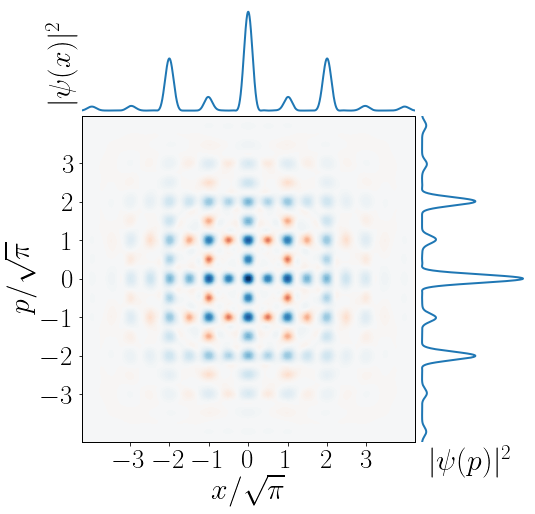

In [54]:
fig, ((ax, bx), (cx, dx)) = plt.subplots(2, 2, figsize = (8,8), gridspec_kw={'width_ratios': [3, 1], 'height_ratios': [1,3], \
                                                                            'wspace' : 0.01, 'hspace' : 0.0})

for i in range(4):
    bx.axis("off")
    if i > 0:
        ax.clear()
        cx.clear()
        dx.clear()
    # Wigner function
    qt.plot_wigner(GKP_floquet_states[i], fig, cx)
    cx.set_title(None)
    cx.set_xlabel('$x / \sqrt{\pi}$', fontsize=1.5*font_size)
    cx.set_xticks([-3*ma.pi**0.5, -2*ma.pi**0.5, -ma.pi**0.5, 0, ma.pi**0.5, 2*ma.pi**0.5, 3*ma.pi**0.5])
    cx.set_xticklabels(['$-3$', '$-2$', '$-1$', '$0$', '$1$', '$2$', '$3$'], fontsize=1.5*tick_size) 
    cx.set_ylabel('$p / \sqrt{\pi}$', fontsize=1.5*font_size)
    cx.set_yticks([-3*ma.pi**0.5, -2*ma.pi**0.5, -ma.pi**0.5, 0, ma.pi**0.5, 2*ma.pi**0.5, 3*ma.pi**0.5])
    cx.set_yticklabels(['$-3$', '$-2$', '$-1$', '$0$', '$1$', '$2$', '$3$'], fontsize=1.5*tick_size) 


    # wavefunctions
    xvalues = np.arange(-7.5, 7.5, 0.001) 
    psix = mf.fock_to_pos(GKP_floquet_states[i], xvalues, 0.0) # x
    psip = mf.fock_to_pos(GKP_floquet_states[i], xvalues, ma.pi/2) # p

    ax.plot(xvalues, np.abs(psix)**2)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.set_xlim(cx.get_xlim())
    ax.set_ylabel('$|\psi(x)|^2$', fontsize=1.5*font_size)

    dx.plot(np.abs(psip)**2, xvalues)
    dx.set_xticks([])
    dx.set_yticks([])
    dx.spines["top"].set_visible(False)
    dx.spines["bottom"].set_visible(False)
    dx.spines["right"].set_visible(False)
    dx.spines["left"].set_visible(False)
    dx.set_ylim(cx.get_ylim())
    dx.set_xlabel('$|\psi(p)|^2$', fontsize=1.5*font_size)

    plt.show()

In [55]:
print(squeezings)

[11.88879005 11.66439547 11.24530257 11.22135261]


In [56]:
b = qt.Bloch3d()
b.add_states([decoded_GKP_floquet_states[i] for i in range(len(GKP_floquet_states))]) 
b.vector_color = ([default_cmap(0), default_cmap(2), default_cmap(3), default_cmap(1)])
b.xlabel= [r'X', '']
b.ylabel= [r'Y', '']
b.zlabel= [r'Z', '']
b.view = [30,-60]
b.size = [1000, 1000]
b.show()

# Adiabatic state preparation

In [57]:
[SP_t, SP_J, SP_fidelities_with_final_state, SP_max_fidelities, SP_quasienergies, SP_closest_floquet_states] = qt.qload('data/SP_t_vs_adiabatic_evolution_data,Deltat=0.1,w0=0.05,ttotal=300')
[HD_t, HD_w, HD_J, HD_fidelities_with_final_state, HD_max_fidelities, HD_quasienergies, HD_closest_floquet_states] = qt.qload('data/HD_t_vs_adiabatic_evolution_data,N=4,J=0.01,ttotal=3000')

Loaded list object.
Loaded list object.


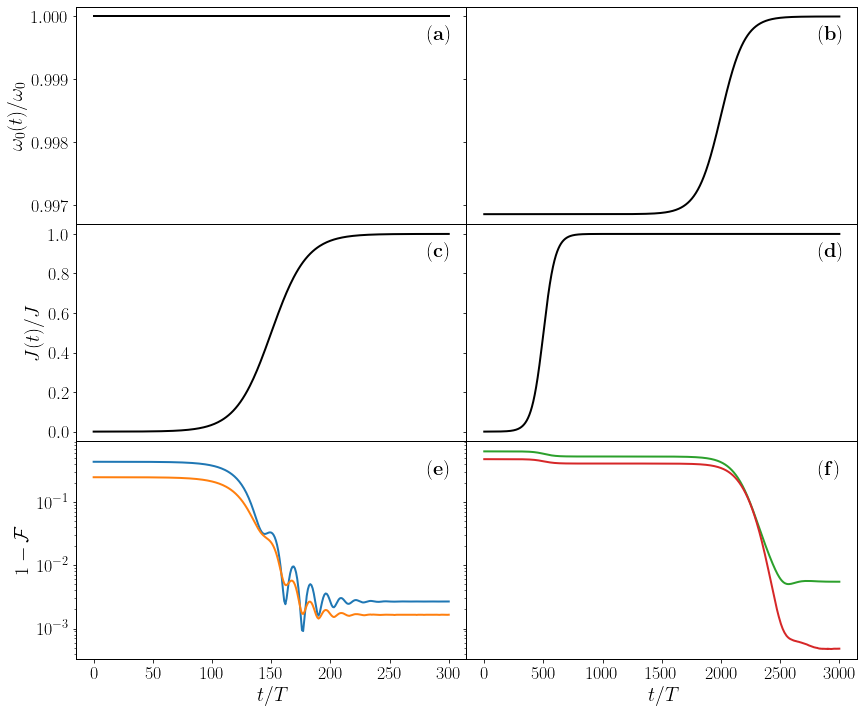

In [58]:
fig = plt.figure(figsize=(14,12))
gs = fig.add_gridspec(3, 2, hspace=0, wspace=0)
axs = gs.subplots(sharex='col', sharey='row')
axs[0,0].plot(SP_t, np.ones(len(SP_t)), color='black')
axs[0,1].plot(HD_t, HD_w/HD_w[-1], color='black')
axs[1,0].plot(SP_t, SP_J/SP_J[-1], color='black')
axs[1,1].plot(HD_t, HD_J/HD_J[-1], color='black')
axs[2,0].plot(SP_t, 1 - np.array(SP_fidelities_with_final_state))
axs[2,1].plot(HD_t, 1 - np.array(HD_fidelities_with_final_state)[:,0], color = default_cmap(2))
axs[2,1].plot(HD_t, 1 - np.array(HD_fidelities_with_final_state)[:,1], color = default_cmap(3))

axs[0,0].set_ylabel(r'$\omega_0(t)/\omega_0$')
axs[1,0].set_ylabel(r'$J(t)/J$')
axs[2,0].set_ylabel(r'$1 - \mathcal{F}$')
axs[2,0].set_yscale('log')
axs[2,0].set_xlabel(r'$t/T$')
axs[2,1].set_xlabel(r'$t/T$')
axs[0,0].text(0.9, 0.85, r'$\mathbf{(a)}$',transform=axs[0,0].transAxes)
axs[0,1].text(0.9, 0.85, r'$\mathbf{(b)}$',transform=axs[0,1].transAxes)
axs[1,0].text(0.9, 0.85, r'$\mathbf{(c)}$',transform=axs[1,0].transAxes)
axs[1,1].text(0.9, 0.85, r'$\mathbf{(d)}$',transform=axs[1,1].transAxes)
axs[2,0].text(0.9, 0.85, r'$\mathbf{(e)}$',transform=axs[2,0].transAxes)
axs[2,1].text(0.9, 0.85, r'$\mathbf{(f)}$',transform=axs[2,1].transAxes)
plt.show()

In [59]:
1 - np.array(SP_fidelities_with_final_state[-1])

array([0.00267542, 0.0016532 ])

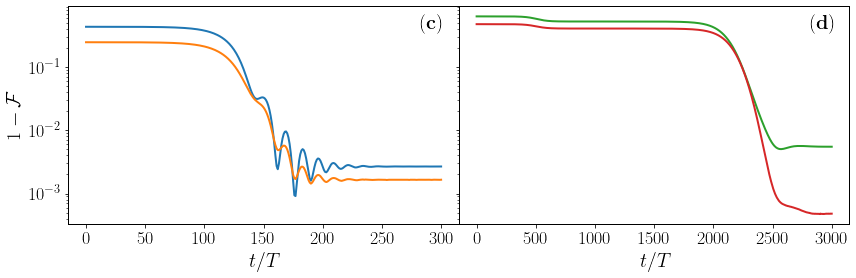

In [60]:
fig = plt.figure(figsize=(14,4))
gs = fig.add_gridspec(1, 2, hspace=0, wspace=0)
axs = gs.subplots(sharex='col', sharey='row')
axs[0].plot(SP_t, 1 - np.array(SP_fidelities_with_final_state))
axs[1].plot(HD_t, 1 - np.array(HD_fidelities_with_final_state)[:,0], color = default_cmap(2))
axs[1].plot(HD_t, 1 - np.array(HD_fidelities_with_final_state)[:,1], color = default_cmap(3))
for i in range(2):
    # axs[i].axhline(y=0.01, linestyle='--', color='black')
    axs[i].set_yscale('log')

axs[0].set_ylabel(r'$1 - \mathcal{F}$')
axs[0].set_xlabel(r'$t/T$')
axs[1].set_xlabel(r'$t/T$')
axs[0].text(0.9, 0.9, r'$\mathbf{(c)}$',transform=axs[0].transAxes)
axs[1].text(0.9, 0.9, r'$\mathbf{(d)}$',transform=axs[1].transAxes)
plt.show()

In [61]:
T_SP = 2*np.pi/0.05 + 4*0.1
T_HD = 2*np.pi/1

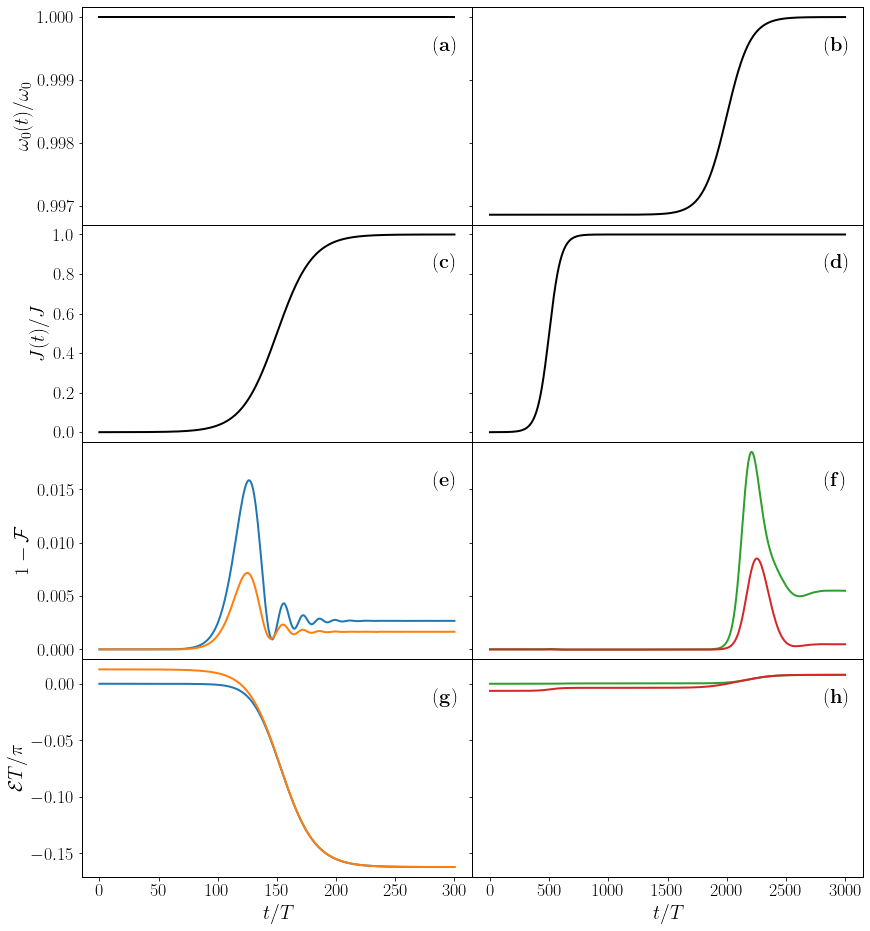

In [62]:
fig = plt.figure(figsize=(14,16))
gs = fig.add_gridspec(4, 2, hspace=0, wspace=0)
axs = gs.subplots(sharex='col', sharey='row')
axs[0,0].plot(SP_t, np.ones(len(SP_t)), color='black')
axs[0,1].plot(HD_t, HD_w/HD_w[-1], color='black')
axs[1,0].plot(SP_t, SP_J/SP_J[-1], color='black')
axs[1,1].plot(HD_t, HD_J/HD_J[-1], color='black')
axs[2,0].plot(SP_t, 1 - np.array(SP_max_fidelities))
axs[2,1].plot(HD_t, 1 - np.array(HD_max_fidelities)[:,0], color = default_cmap(2))
axs[2,1].plot(HD_t, 1 - np.array(HD_max_fidelities)[:,1], color = default_cmap(3))
axs[3,0].plot(SP_t, np.array(SP_quasienergies)[:,0]*T_SP/np.pi)
axs[3,0].plot(SP_t, np.array(SP_quasienergies)[:,1]*T_SP/np.pi)
axs[3,1].plot(HD_t, np.array(HD_quasienergies)[:,0]*T_HD/np.pi, color = default_cmap(2))
axs[3,1].plot(HD_t, np.array(HD_quasienergies)[:,1]*T_HD/np.pi, color = default_cmap(3))

axs[0,0].set_ylabel(r'$\omega_0(t)/\omega_0$')
axs[1,0].set_ylabel(r'$J(t)/J$')
axs[2,0].set_ylabel(r'$1 - \mathcal{F}$')
axs[3,0].set_ylabel(r'$\mathcal{E}T/\pi$')
axs[3,0].set_xlabel(r'$t/T$')
axs[3,1].set_xlabel(r'$t/T$')
axs[0,0].text(0.9, 0.8, r'$\mathbf{(a)}$',transform=axs[0,0].transAxes)
axs[0,1].text(0.9, 0.8, r'$\mathbf{(b)}$',transform=axs[0,1].transAxes)
axs[1,0].text(0.9, 0.8, r'$\mathbf{(c)}$',transform=axs[1,0].transAxes)
axs[1,1].text(0.9, 0.8, r'$\mathbf{(d)}$',transform=axs[1,1].transAxes)
axs[2,0].text(0.9, 0.8, r'$\mathbf{(e)}$',transform=axs[2,0].transAxes)
axs[2,1].text(0.9, 0.8, r'$\mathbf{(f)}$',transform=axs[2,1].transAxes)
axs[3,0].text(0.9, 0.8, r'$\mathbf{(g)}$',transform=axs[3,0].transAxes)
axs[3,1].text(0.9, 0.8, r'$\mathbf{(h)}$',transform=axs[3,1].transAxes)

plt.show()

In [63]:
[SP_ttotals, SP_max_fidelities] = qt.qload('data/SP_tf_vs_F,w0=0.05,Deltat=0.1_v2')
[HD_ttotals, HD_max_fidelities] = qt.qload('data/HD_tf_vs_F,J=0.01,N=4_v2')

Loaded list object.
Loaded list object.


In [64]:
print(SP_ttotals)
print(HD_ttotals)

[75, 150, 300, 600, 1000]
[750, 1500, 3000, 6000, 10000]


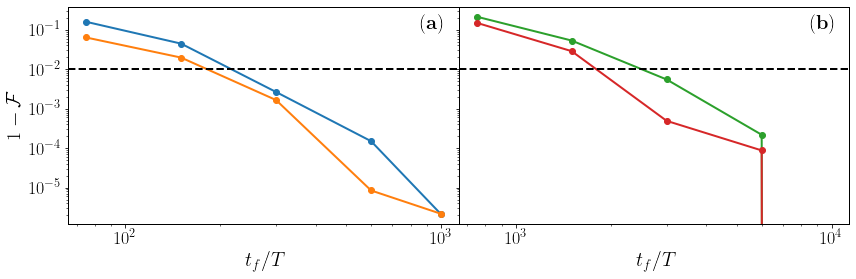

In [65]:
fig = plt.figure(figsize=(14,4))
gs = fig.add_gridspec(1, 2, hspace=0, wspace=0)
axs = gs.subplots(sharex='col', sharey='row')
axs[0].plot(SP_ttotals, 1 - np.array(SP_max_fidelities)[0,:], 'o-')
axs[0].plot(SP_ttotals, 1 - np.array(SP_max_fidelities)[1,:], 'o-')
axs[1].plot(HD_ttotals, 1 - np.array(HD_max_fidelities)[0,:], 'o-', color = default_cmap(2))
axs[1].plot(HD_ttotals, 1 - np.array(HD_max_fidelities)[1,:], 'o-', color = default_cmap(3))
for i in range(2):
    axs[i].axhline(y=0.01, linestyle='--', color='black')
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')

axs[0].set_ylabel(r'$1 - \mathcal{F}$')
axs[0].set_xlabel(r'$t_f/T$')
axs[1].set_xlabel(r'$t_f/T$')
axs[0].text(0.9, 0.9, r'$\mathbf{(a)}$',transform=axs[0].transAxes)
axs[1].text(0.9, 0.9, r'$\mathbf{(b)}$',transform=axs[1].transAxes)

plt.show()

# Hex code

In [66]:
%%time
# Complex numbers for hexagonal GKP code
alpha = np.sqrt(np.pi/np.sqrt(3))
beta = np.exp(2j*np.pi/3)*alpha 
# Approximate hexagonal GKP codewords
N = 4
Delta = 0.25
ApproxGKP0 = qt.Qobj(np.zeros(fockdim))
ApproxGKP1 = qt.Qobj(np.zeros(fockdim))
for m in np.arange(-N, N+1, dtype=float):
    for n in np.arange(-N, N+1, dtype=float):
        ApproxGKP0 += (-Delta**2 * a.dag()*a).expm() * \
            np.exp(-1j*ma.pi*m*n) * mf.displacement_fock(2*m*alpha + n*beta, fockdim) * qt.basis(fockdim, 0)
        ApproxGKP1 += (-Delta**2 * a.dag()*a).expm() * \
            np.exp(-1j*ma.pi * (m*n + 0.5*n)) * mf.displacement_fock((2*m + 1)*alpha + n*beta, fockdim) * qt.basis(fockdim, 0)

Wall time: 2min 36s


## $| \bar{0}^\Delta \rangle$

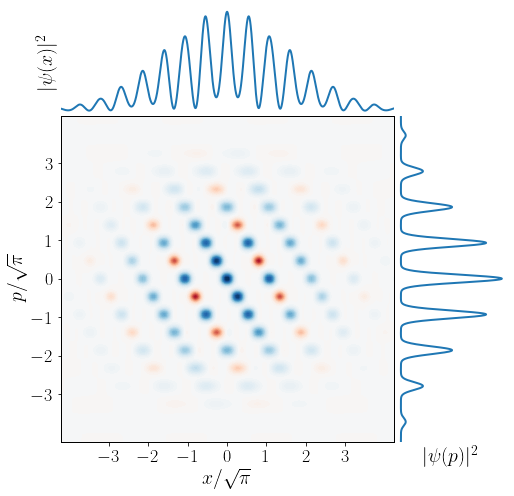

In [67]:
fig, ((ax, bx), (cx, dx)) = plt.subplots(2, 2, figsize = (8,8), gridspec_kw={'width_ratios': [3, 1], 'height_ratios': [1,3], \
                                                                            'wspace' : 0.01, 'hspace' : 0.0})
bx.axis("off")

# Wigner function
qt.plot_wigner(ApproxGKP0, fig, cx)
cx.set_title(None)
cx.set_xlabel('$x / \sqrt{\pi}$', fontsize=font_size)
cx.set_xticks([-3*ma.pi**0.5, -2*ma.pi**0.5, -ma.pi**0.5, 0, ma.pi**0.5, 2*ma.pi**0.5, 3*ma.pi**0.5])
cx.set_xticklabels(['$-3$', '$-2$', '$-1$', '$0$', '$1$', '$2$', '$3$']) 
cx.set_ylabel('$p / \sqrt{\pi}$', fontsize=font_size)
cx.set_yticks([-3*ma.pi**0.5, -2*ma.pi**0.5, -ma.pi**0.5, 0, ma.pi**0.5, 2*ma.pi**0.5, 3*ma.pi**0.5])
cx.set_yticklabels(['$-3$', '$-2$', '$-1$', '$0$', '$1$', '$2$', '$3$']) 

# wavefunctions
xvalues = np.arange(-7.5, 7.5, 0.001) 
psix = mf.fock_to_pos(ApproxGKP0, xvalues, 0.0) # x
psip = mf.fock_to_pos(ApproxGKP0, xvalues, ma.pi/2) # p

ax.plot(xvalues, np.abs(psix)**2)
ax.set_xticks([])
ax.set_yticks([])
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_xlim(cx.get_xlim())
ax.set_ylabel('$|\psi(x)|^2$')

dx.plot(np.abs(psip)**2, xvalues)
dx.set_xticks([])
dx.set_yticks([])
dx.spines["top"].set_visible(False)
dx.spines["bottom"].set_visible(False)
dx.spines["right"].set_visible(False)
dx.spines["left"].set_visible(False)
dx.set_ylim(cx.get_ylim())
dx.set_xlabel('$|\psi(p)|^2$')

plt.show()

## $| \bar{1}^\Delta \rangle$

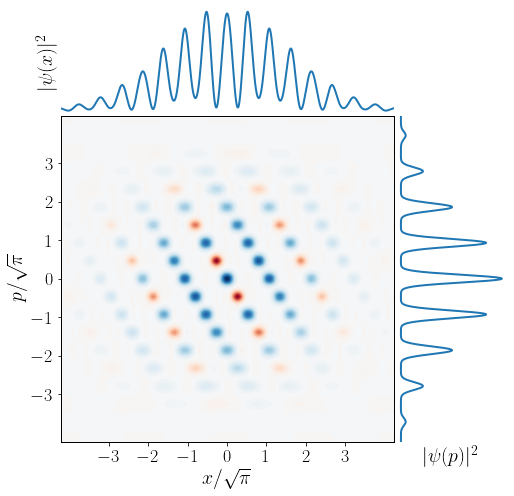

In [68]:
fig, ((ax, bx), (cx, dx)) = plt.subplots(2, 2, figsize = (8,8), gridspec_kw={'width_ratios': [3, 1], 'height_ratios': [1,3], \
                                                                            'wspace' : 0.01, 'hspace' : 0.0})
bx.axis("off")

# Wigner function
qt.plot_wigner(ApproxGKP1, fig, cx)
cx.set_title(None)
cx.set_xlabel('$x / \sqrt{\pi}$', fontsize=font_size)
cx.set_xticks([-3*ma.pi**0.5, -2*ma.pi**0.5, -ma.pi**0.5, 0, ma.pi**0.5, 2*ma.pi**0.5, 3*ma.pi**0.5])
cx.set_xticklabels(['$-3$', '$-2$', '$-1$', '$0$', '$1$', '$2$', '$3$']) 
cx.set_ylabel('$p / \sqrt{\pi}$', fontsize=font_size)
cx.set_yticks([-3*ma.pi**0.5, -2*ma.pi**0.5, -ma.pi**0.5, 0, ma.pi**0.5, 2*ma.pi**0.5, 3*ma.pi**0.5])
cx.set_yticklabels(['$-3$', '$-2$', '$-1$', '$0$', '$1$', '$2$', '$3$']) 

# wavefunctions
xvalues = np.arange(-7.5, 7.5, 0.001) 
psix = mf.fock_to_pos(ApproxGKP1, xvalues, 0.0) # x
psip = mf.fock_to_pos(ApproxGKP1, xvalues, ma.pi/2) # p

ax.plot(xvalues, np.abs(psix)**2)
ax.set_xticks([])
ax.set_yticks([])
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_xlim(cx.get_xlim())
ax.set_ylabel('$|\psi(x)|^2$')

dx.plot(np.abs(psip)**2, xvalues)
dx.set_xticks([])
dx.set_yticks([])
dx.spines["top"].set_visible(False)
dx.spines["bottom"].set_visible(False)
dx.spines["right"].set_visible(False)
dx.spines["left"].set_visible(False)
dx.set_ylim(cx.get_ylim())
dx.set_xlabel('$|\psi(p)|^2$')

plt.show()

In [69]:
# Driving function
def f(t, args):
    w = args['w']
    A = args['A']
    f = 0
    for n in range(len(A)):
        if n == 0:
            f += 0.5*A[n]
        else: 
            f += A[n]*np.cos(6*n*w*t)
    return f

In [70]:
# Change fontsizes and linewidth:
font_size = 32
tick_size = 28
line_width = 2
params = {
          #'backend': 'ps',
          'axes.labelsize': font_size,
          'font.size': font_size,
          'legend.fontsize': font_size,  
          'xtick.labelsize': tick_size,
          'ytick.labelsize': tick_size,
          'text.usetex': True,
          'figure.figsize': fig_size,
          'axes.linewidth': line_width,  
          'lines.linewidth': line_width,   
          }
plt.rcParams.update(params)

default_cmap = plt.get_cmap("tab10")

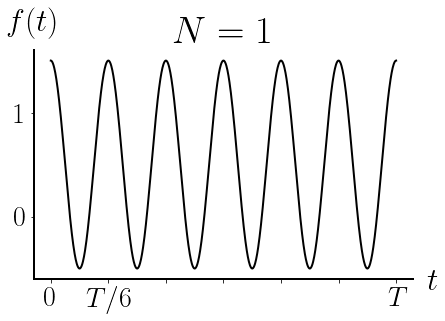

In [71]:
w = 1
T = 2*ma.pi/w
t = np.linspace(0,T,1000)
N = 1
plt.plot(t,f(t, {'w':w, 'A':np.ones(N+1)}), color='black')
plt.xlabel(r'$t$')
plt.ylabel(r'$f(t)$', rotation='horizontal')
plt.xticks([0, T/6, T/3, T/2, 2*T/3, 5*T/6, T])
ax = plt.gca()
ax.xaxis.set_label_coords(1.05, 0.05)
ax.yaxis.set_label_coords(0.0, 1.05)
ax.set_xticklabels([r'$0$', r'$T/6$', r'', r'', r'', r'', r'$T$']) 
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.title(f'$N={N}$')
plt.show()

In [72]:
# Change back set fontsizes and linewidths:
font_size = 20
tick_size = 18
params = {
          #'backend': 'ps',
          'axes.labelsize': font_size,
          'font.size': font_size,
          'legend.fontsize': font_size,
          'xtick.labelsize': tick_size,
          'ytick.labelsize': tick_size,
          'axes.linewidth': 1, 
          'text.usetex': True,
          'figure.figsize': fig_size,
          }
plt.rcParams.update(params)

default_cmap = plt.get_cmap("tab10")

In [73]:
[SP_squeezings, SP_GKP_floquet_states, SP_decoded_GKP_floquet_states] = qt.qload('data/SP_tplusminus_states_hex_6T,Deltat=0.1,w0=0.05')

Loaded list object.


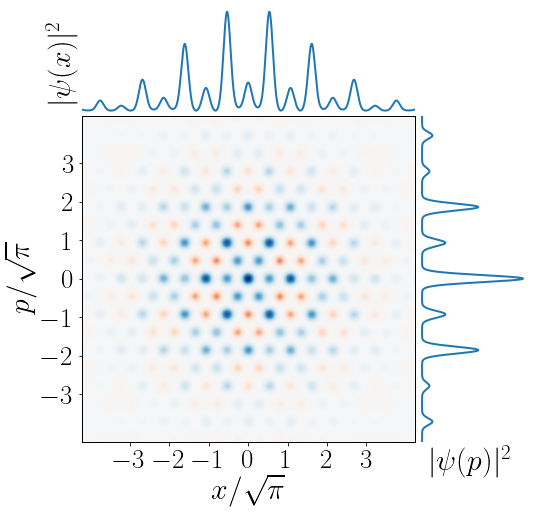

In [74]:
fig, ((ax, bx), (cx, dx)) = plt.subplots(2, 2, figsize = (8,8), gridspec_kw={'width_ratios': [3, 1], 'height_ratios': [1,3], \
                                                                            'wspace' : 0.01, 'hspace' : 0.0})

for i in range(2):
    bx.axis("off")
    if i > 0:
        ax.clear()
        cx.clear()
        dx.clear()
    # Wigner function
    qt.plot_wigner(SP_GKP_floquet_states[i], fig, cx)
    cx.set_title(None)
    cx.set_xlabel('$x / \sqrt{\pi}$', fontsize=1.5*font_size)
    cx.set_xticks([-3*ma.pi**0.5, -2*ma.pi**0.5, -ma.pi**0.5, 0, ma.pi**0.5, 2*ma.pi**0.5, 3*ma.pi**0.5])
    cx.set_xticklabels(['$-3$', '$-2$', '$-1$', '$0$', '$1$', '$2$', '$3$'], fontsize=1.5*tick_size) 
    cx.set_ylabel('$p / \sqrt{\pi}$', fontsize=1.5*font_size)
    cx.set_yticks([-3*ma.pi**0.5, -2*ma.pi**0.5, -ma.pi**0.5, 0, ma.pi**0.5, 2*ma.pi**0.5, 3*ma.pi**0.5])
    cx.set_yticklabels(['$-3$', '$-2$', '$-1$', '$0$', '$1$', '$2$', '$3$'], fontsize=1.5*tick_size) 


    # wavefunctions
    xvalues = np.arange(-7.5, 7.5, 0.001) 
    psix = mf.fock_to_pos(SP_GKP_floquet_states[i], xvalues, 0.0) # x
    psip = mf.fock_to_pos(SP_GKP_floquet_states[i], xvalues, ma.pi/2) # p

    ax.plot(xvalues, np.abs(psix)**2)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.set_xlim(cx.get_xlim())
    ax.set_ylabel('$|\psi(x)|^2$', fontsize=1.5*font_size)

    dx.plot(np.abs(psip)**2, xvalues)
    dx.set_xticks([])
    dx.set_yticks([])
    dx.spines["top"].set_visible(False)
    dx.spines["bottom"].set_visible(False)
    dx.spines["right"].set_visible(False)
    dx.spines["left"].set_visible(False)
    dx.set_ylim(cx.get_ylim())
    dx.set_xlabel('$|\psi(p)|^2$', fontsize=1.5*font_size)
    
    if i==0:
        plt.show()
    if i==1:
        plt.show()

In [75]:
print(SP_squeezings)

[12.147464113588104, 12.147876778532506]


In [76]:
[HD_squeezings, HD_GKP_floquet_states, HD_decoded_GKP_floquet_states] = qt.qload('data/HD_2_highest_squeezed_states_hex_6T,N=2,J=0.01,A=DD')

Loaded list object.


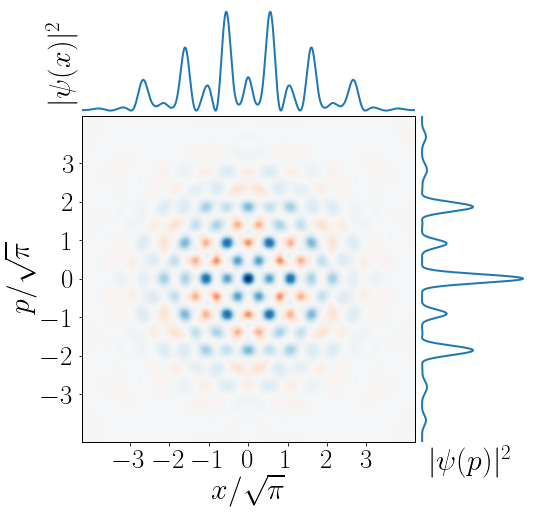

In [77]:
fig, ((ax, bx), (cx, dx)) = plt.subplots(2, 2, figsize = (8,8), gridspec_kw={'width_ratios': [3, 1], 'height_ratios': [1,3], \
                                                                            'wspace' : 0.01, 'hspace' : 0.0})

for i in range(2):
    bx.axis("off")
    if i > 0:
        ax.clear()
        cx.clear()
        dx.clear()
    # Wigner function
    qt.plot_wigner(HD_GKP_floquet_states[i], fig, cx)
    cx.set_title(None)
    cx.set_xlabel('$x / \sqrt{\pi}$', fontsize=1.5*font_size)
    cx.set_xticks([-3*ma.pi**0.5, -2*ma.pi**0.5, -ma.pi**0.5, 0, ma.pi**0.5, 2*ma.pi**0.5, 3*ma.pi**0.5])
    cx.set_xticklabels(['$-3$', '$-2$', '$-1$', '$0$', '$1$', '$2$', '$3$'], fontsize=1.5*tick_size) 
    cx.set_ylabel('$p / \sqrt{\pi}$', fontsize=1.5*font_size)
    cx.set_yticks([-3*ma.pi**0.5, -2*ma.pi**0.5, -ma.pi**0.5, 0, ma.pi**0.5, 2*ma.pi**0.5, 3*ma.pi**0.5])
    cx.set_yticklabels(['$-3$', '$-2$', '$-1$', '$0$', '$1$', '$2$', '$3$'], fontsize=1.5*tick_size) 


    # wavefunctions
    xvalues = np.arange(-7.5, 7.5, 0.001) 
    psix = mf.fock_to_pos(HD_GKP_floquet_states[i], xvalues, 0.0) # x
    psip = mf.fock_to_pos(HD_GKP_floquet_states[i], xvalues, ma.pi/2) # p

    ax.plot(xvalues, np.abs(psix)**2)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.set_xlim(cx.get_xlim())
    ax.set_ylabel('$|\psi(x)|^2$', fontsize=1.5*font_size)

    dx.plot(np.abs(psip)**2, xvalues)
    dx.set_xticks([])
    dx.set_yticks([])
    dx.spines["top"].set_visible(False)
    dx.spines["bottom"].set_visible(False)
    dx.spines["right"].set_visible(False)
    dx.spines["left"].set_visible(False)
    dx.set_ylim(cx.get_ylim())
    dx.set_xlabel('$|\psi(p)|^2$', fontsize=1.5*font_size)

    plt.show()

In [78]:
print(HD_squeezings)

[10.50782094 10.1655169 ]


In [79]:
b = qt.Bloch3d()
b.add_states([SP_decoded_GKP_floquet_states[i] for i in range(len(SP_GKP_floquet_states))])
#b.add_states([HD_decoded_GKP_floquet_states[i] for i in range(len(HD_GKP_floquet_states))]) 
b.vector_color = ([default_cmap(i) for i in range(2)])
b.xlabel= [r'X', '']
b.ylabel= [r'Y', '']
b.zlabel= [r'Z', '']
b.view = [30,-60]
b.size = [1000, 1000]
b.show()
plt.show()